In [44]:
%matplotlib notebook
import pandas as pd
import os
import numpy as np
from config import apikey
import gmaps
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [45]:
bcross_df = pd.read_csv('Border_Crossing_Entry_Data.csv')
overtime = bcross_df.drop(["Port Code","Border","Location","State"], axis=1)

In [46]:
port = 'El Paso'
measure = 'Personal Vehicles'
def cleantime(port, measure):
    wdf = overtime[overtime['Port Name'] == port]
    wdf = wdf[wdf['Measure'] == measure]
    wdf['Month'] = wdf['Date'].str.split(" ")
    wdf.loc[:, 'Day'] = wdf.Month.map(lambda x: x[0])
    del wdf['Date']
    del wdf['Month']
    return wdf
elpaso = cleantime(port, measure)


<IPython.core.display.Javascript object>


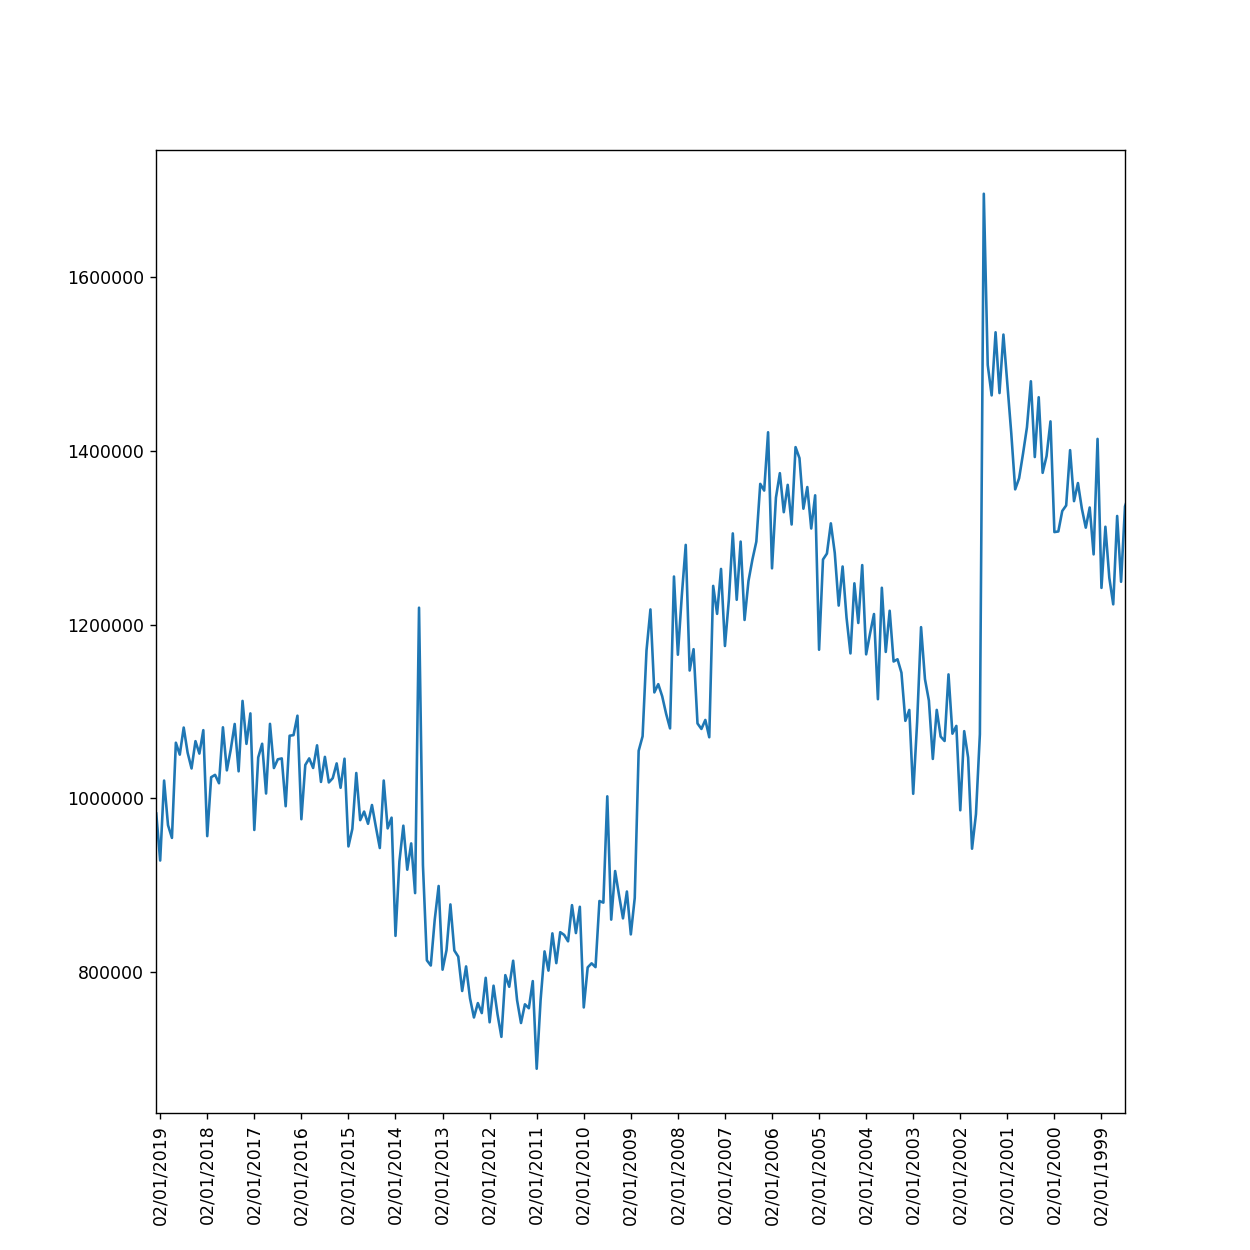

In [104]:
elp=plt.plot(elpaso['Day'], elpaso['Value'],label="Personal Vehicles")
matplotlib.rc('figure', figsize=[10,10])
plt.xticks(rotation='vertical')
plt.xticks(np.arange(1, 247, 12.0))
plt.xlim(0, 247)
plt.savefig('personal_vehicles_overtime.png')